<a href="https://colab.research.google.com/github/Mano2610/CE888/blob/main/Lab/Lab8/Lab8%20exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip

--2021-05-05 15:39:15--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-05-05 15:39:16--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M   100MB/s    in 0.2s    

2021-05-05 15:39:17 (100 MB/s) - ‘data.zip’ saved [20194537/20194537]



In [2]:
import os

In [3]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
# Get all the paths
data_dir_list = os.listdir('/content/data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count1 = len(files)
path, dirs, files = next(os.walk("/content/data/cats"))
file_count2 = len(files)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count3 = len(files)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count4 = len(files)
print(file_count1 + file_count2 + file_count3 + file_count4)

['Humans', 'dogs', 'horses', 'cats']
808


In [5]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/image_classification'
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
import shutil

original_dataset_dir = '/content/data/cats'
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 163)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(163, 184)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(184, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
original_dataset_dir = '/content/data/dogs'
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 163)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(163, 184)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(184, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/horses'
fnames = ['horse-{}.jpg'.format(i) for i in range(1, 163)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(163, 184)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(184, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/Humans'
fnames = ['rider-{}.jpg'.format(i) for i in range(1, 163)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(163, 184)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(184, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


In [8]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [9]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0

    else:
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3

In [10]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [11]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [12]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))


In [13]:
model =InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [14]:
from keras.layers import Dropout
from keras.regularizers import l2
from keras.layers import BatchNormalization

In [15]:
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(32, activation='relu', name='fc1', kernel_regularizer = l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', name='fc2')(x)


out = Dense(4, activation='softmax', name='output')(x) 
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='resnet50_model.h5', save_best_only=True),
]

In [18]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=30, 
                              validation_data=(val_X, val_y)
                              )

Epoch 1/30
33/33 [==============================] - 44s 247ms/step - loss: 2.2907 - acc: 0.2238 - val_loss: 1.9944 - val_acc: 0.3095
Epoch 2/30
33/33 [==============================] - 4s 132ms/step - loss: 2.0380 - acc: 0.3324 - val_loss: 1.9286 - val_acc: 0.3690
Epoch 3/30
33/33 [==============================] - 4s 133ms/step - loss: 1.9919 - acc: 0.3620 - val_loss: 1.8778 - val_acc: 0.4762
Epoch 4/30
33/33 [==============================] - 4s 132ms/step - loss: 1.9533 - acc: 0.3920 - val_loss: 1.8376 - val_acc: 0.5238
Epoch 5/30
33/33 [==============================] - 4s 133ms/step - loss: 1.9267 - acc: 0.3861 - val_loss: 1.7926 - val_acc: 0.6071
Epoch 6/30
33/33 [==============================] - 4s 133ms/step - loss: 1.8827 - acc: 0.4384 - val_loss: 1.7672 - val_acc: 0.6190
Epoch 7/30
33/33 [==============================] - 4s 133ms/step - loss: 1.8291 - acc: 0.4981 - val_loss: 1.7380 - val_acc: 0.6429
Epoch 8/30
33/33 [==============================] - 4s 133ms/step - loss: 1

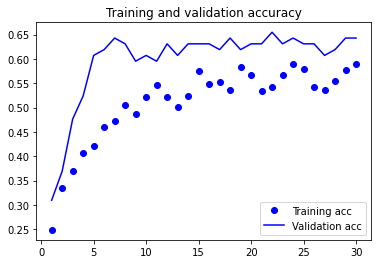

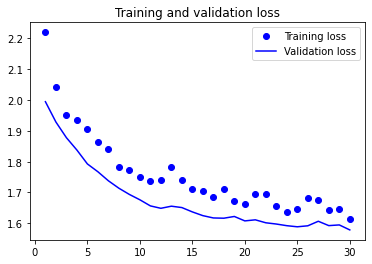

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()